Initialize Python libraries

Numpy - For Numerical and Scientific Computing: https://numpy.org/doc/stable/user/quickstart.html

Pandas - For Structured data manipulation such as data on tabulated form: https://pandas.pydata.org/docs/getting_started/index.html

Matplotlib - Data Visualization:https://matplotlib.org/stable/users/explain/quick_start.html

Seaborn - data visualizations for more aesthetic: https://seaborn.pydata.org/tutorial/introduction.html

Scikit-Learn - Machine learning library: https://scikit-learn.org/stable/tutorial/index.html

Tensorflow and Keras (note in this activity Tensorflow and Keras are not used) - Deep learning library: https://www.tensorflow.org/guide/basics

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler #from preprocessing method of scikit learn initialize standard scaler to prepare the data by scaling it into standard deviation form
from sklearn.model_selection import train_test_split
from tensorflow.keras import models, layers, utils, backend as K
from tensorflow.keras import layers, callbacks

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/letter-recognition.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Your dataset path might different from below path
path = "/content/drive/MyDrive/MSAI/[MSAI] 2Y - 1S/Introduction_to_AI/week_Sep17/letter-recognition.csv"

#using pandas pd.read_csv to access the csv data from our path
df = pd.read_csv(path)

In [ ]:
df = pd.read_csv('/content/letter-recognition.csv')
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [ ]:
df.shape

(20000, 17)

In [ ]:
#Data Cleaning: Remove any white spaces on the dataset
df.columns = df.columns.str.strip()

In [ ]:
#Data Exploration: Aggregate data or count how many times each letter column appear on dataset
df['letter'].value_counts()

U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: letter, dtype: int64

In [ ]:
#Data Cleaning: Check if there is any null values on our dataframe, in this case all zero meaning no missing values
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [ ]:
#Data Exploration: Perform Summary Statistics using df.describe() method on data to understand it if there is outlier or inconsistent to our dataset
round(df.describe(),2)

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00
mean,4.02,7.04,5.12,5.37,3.51,6.90,7.50,4.63,5.18,8.28,6.45,7.93,3.05,8.34,3.69,7.80
std,1.91,3.30,2.01,2.26,2.19,2.03,2.33,2.70,2.38,2.49,2.63,2.08,2.33,1.55,2.57,1.62
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,3.00,5.00,4.00,4.00,2.00,6.00,6.00,3.00,4.00,7.00,5.00,7.00,1.00,8.00,2.00,7.00
50%,4.00,7.00,5.00,6.00,3.00,7.00,7.00,4.00,5.00,8.00,6.00,8.00,3.00,8.00,3.00,8.00
75%,5.00,9.00,6.00,7.00,5.00,8.00,9.00,6.00,7.00,10.00,8.00,9.00,4.00,9.00,5.00,9.00
max,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00


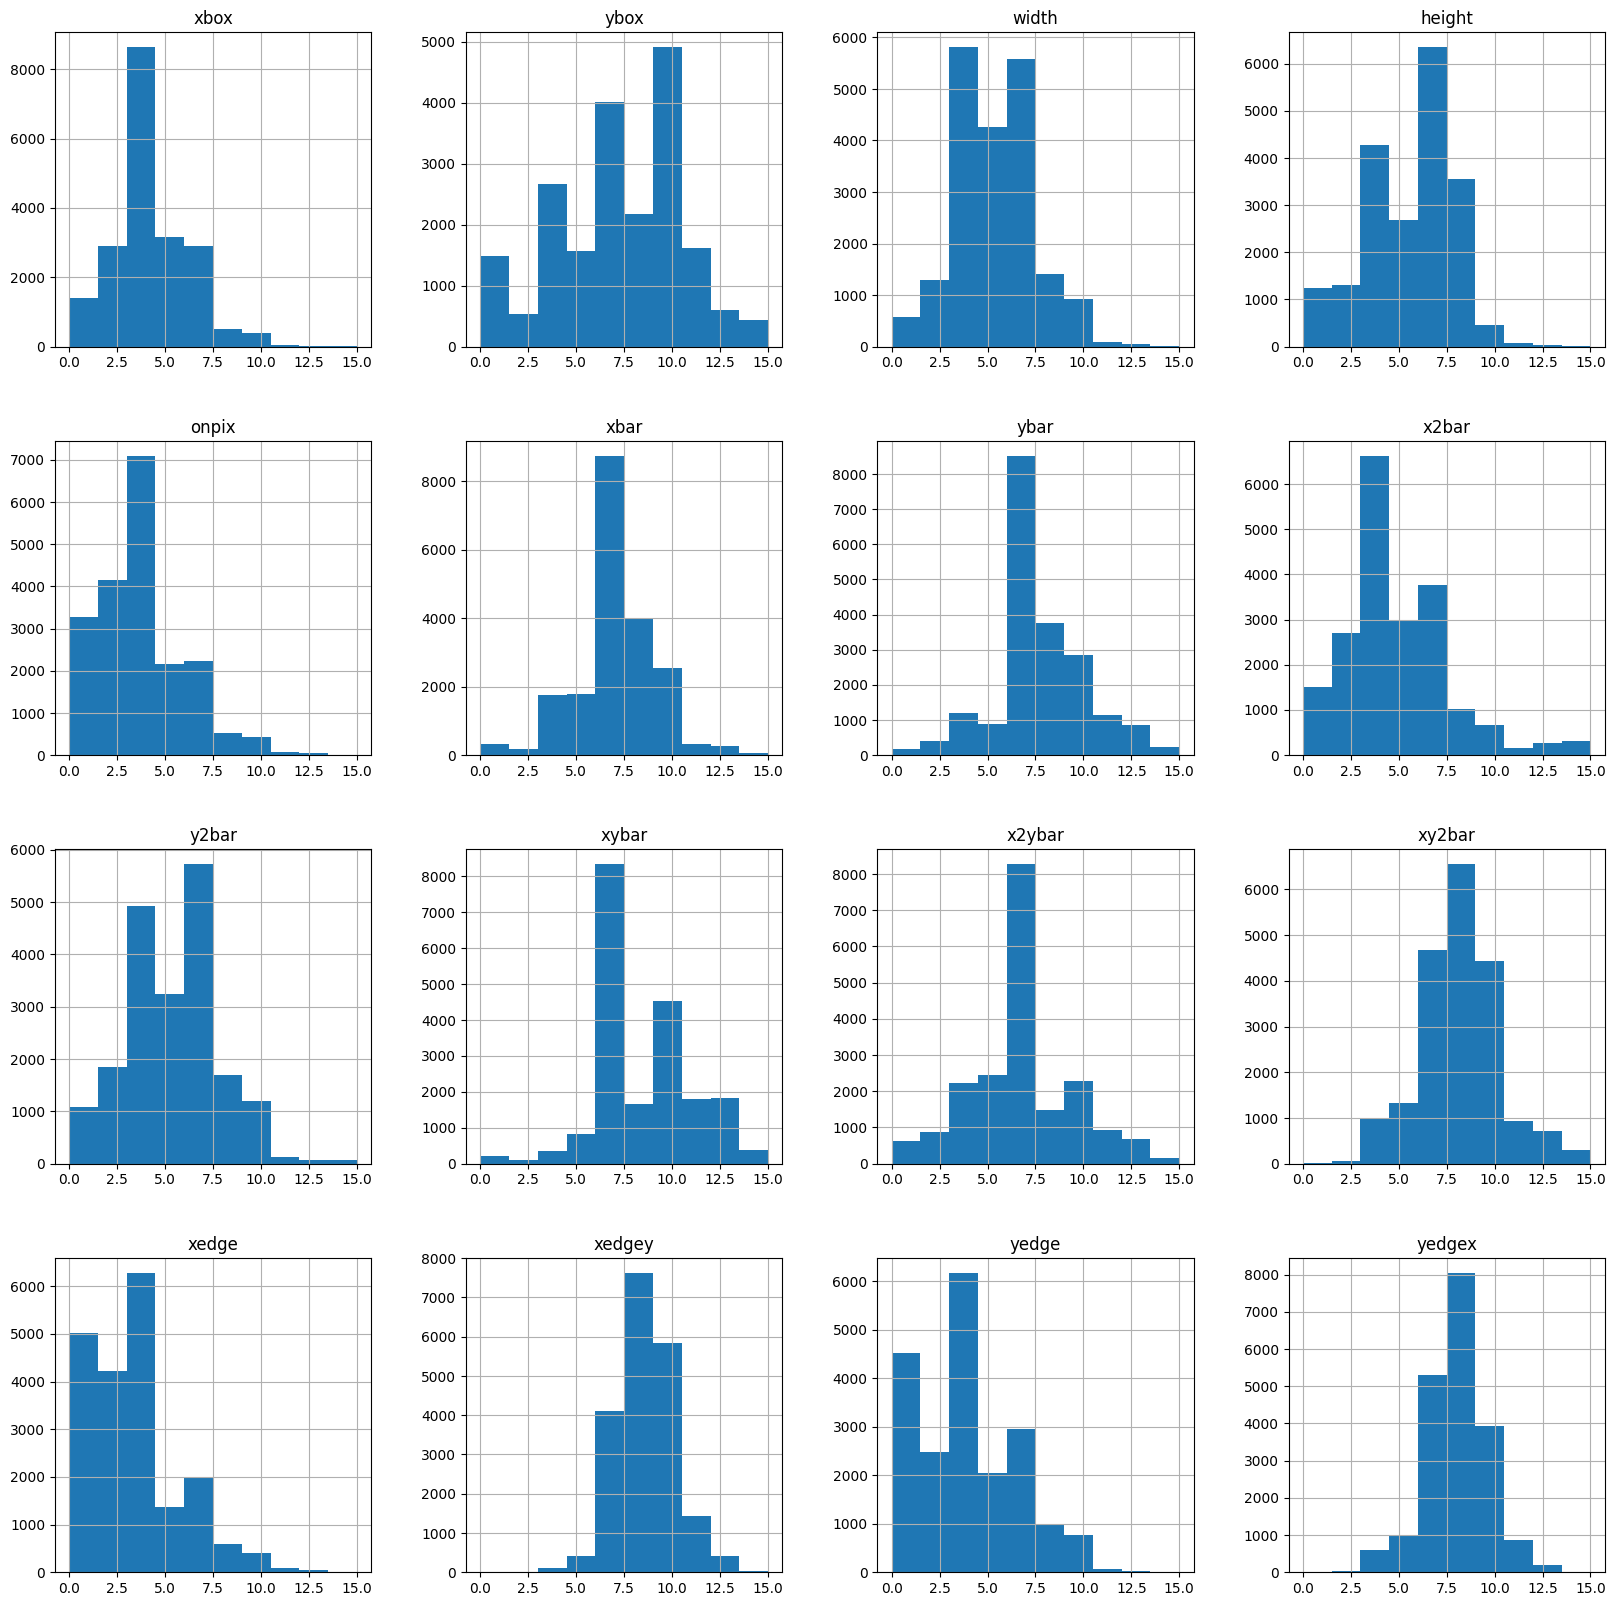

In [ ]:
#Plot the histogram to have more visual understanding to our dataset
df.hist(figsize = (20,20))
plt.show()

## **Prepare the Train and Test Dataset**

In [ ]:
#Set X as feature. By dropping column letter to get the feature
X = df.drop(['letter'], axis=1)

#Set y as target
y = df['letter']

In [ ]:
#Using the train_test_split method of Scikit Learn to split our data for training and testing. On this case the test set is set to 0.2 or 20% of the dataset
"""
X_train and y_train - this set is use to train the model
X_test and y_test - this set is use to test the model
"""
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#training and test set shape
X_train.shape, X_test.shape

((16000, 16), (4000, 16))

In [ ]:
#training set features
cols = X_train.columns
cols

Index(['xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar',
       'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey', 'yedge',
       'yedgex'],
      dtype='object')

In [ ]:
#Using the StandardScaler() from Scikit library to scale our features
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
#convert train and test set to dataframe to perform summary statistics on it
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

#summary statistics
X_train.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04
mean,-4.463097e-17,9.359180e-17,4.263256e-17,2.664535e-18,4.440892e-18,4.041212e-17,6.794565e-17,5.262457e-17,-6.572520e-17,-2.593481e-16,-1.487699e-16,8.881784e-19,-1.687539e-17,-4.000134e-16,-3.197442e-17,-1.564304e-16
std,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00,1.000031e+00
min,-2.099664e+00,-2.133838e+00,-2.532818e+00,-2.372225e+00,-1.599408e+00,-3.403667e+00,-3.223370e+00,-1.716585e+00,-2.168609e+00,-3.335602e+00,-2.454246e+00,-3.824435e+00,-1.306847e+00,-5.406182e+00,-1.441915e+00,-4.816080e+00
25%,-5.356199e-01,-6.201557e-01,-5.553332e-01,-6.067252e-01,-6.877397e-01,-4.455910e-01,-6.428677e-01,-6.024468e-01,-4.927741e-01,-5.163721e-01,-5.491639e-01,-4.449726e-01,-4.502493e-01,-2.223383e-01,-6.619879e-01,-4.913233e-01
50%,-1.427190e-02,-1.468272e-02,-6.096214e-02,2.760249e-01,-2.319056e-01,4.742165e-02,-2.127839e-01,-2.310675e-01,-7.381531e-02,-1.136250e-01,-1.681473e-01,3.780774e-02,-2.195032e-02,-2.223383e-01,-2.720241e-01,1.264991e-01
75%,5.070761e-01,5.907903e-01,4.334090e-01,7.173999e-01,6.797626e-01,5.404343e-01,6.473836e-01,5.116910e-01,7.641023e-01,6.918691e-01,5.938857e-01,5.205881e-01,4.063487e-01,4.256422e-01,5.079034e-01,1.264991e-01
max,5.720556e+00,2.407209e+00,4.882749e+00,4.248400e+00,5.238104e+00,3.991523e+00,3.227886e+00,3.854104e+00,4.115773e+00,2.705604e+00,3.261001e+00,3.417270e+00,5.117637e+00,4.313525e+00,4.407541e+00,4.451256e+00


Train the model: Support Vector Machine is the machine learning model use in this activity

Support Vector Machine: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [ ]:
# import SVC classifier
from sklearn.svm import SVC

# import metrics to compute accuracy
from sklearn.metrics import accuracy_score

# instantiate classifier with polynomial kernel and C=1.0
poly_svc=SVC(kernel='poly', C=100.0)

# fit classifier to training set
poly_svc.fit(X_train,y_train)

# make predictions on test set
y_pred_test=poly_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with polynomial kernel and C=100.0 : 0.9567


## **Plot Confusion matrix**

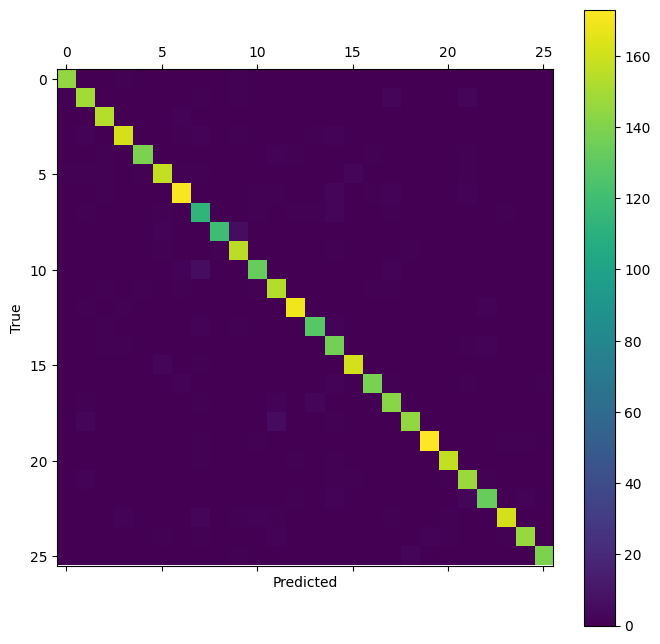

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Example predicted and true labels
y_pred_test = poly_svc.predict(X_test)
y_true = y_test

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_test)

# Visualize the confusion matrix
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

# Plot the matrix
cax = ax.matshow(cm)

# Add colorbar for reference
fig.colorbar(cax)

# Add labels to the plot
plt.xlabel("Predicted")
plt.ylabel("True")

# Show the plot
plt.show()

## **More detailed confusion matrix plot**

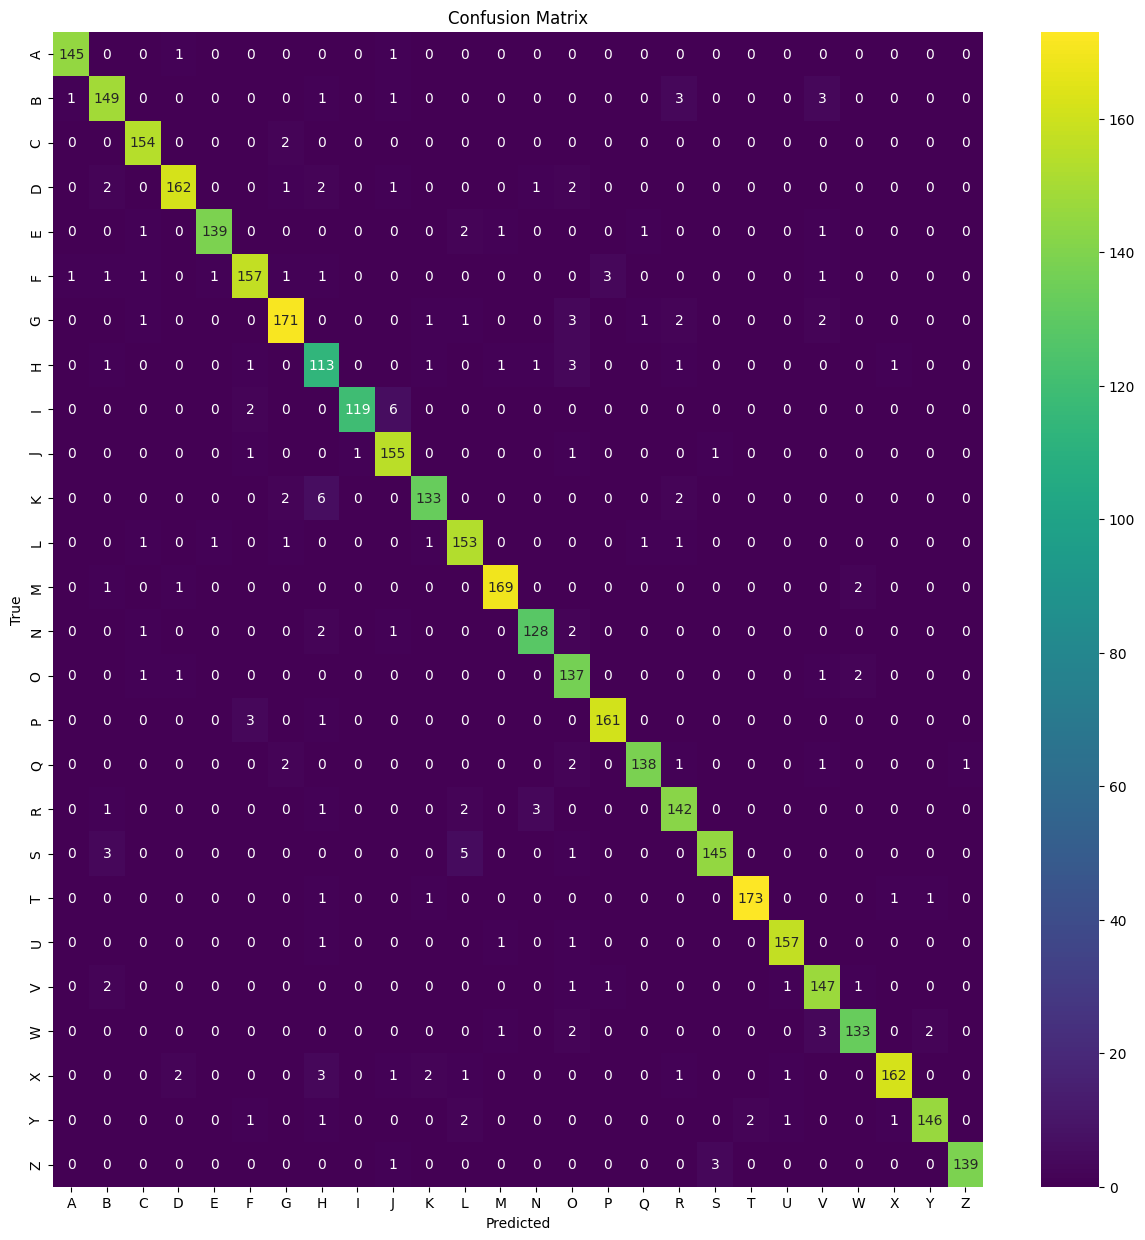

In [ ]:
# Create another visualization using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(cm, annot=True, fmt='g', cmap='viridis')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('True')

# Set tick labels
class_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
ax.xaxis.set_ticklabels(class_labels)
ax.yaxis.set_ticklabels(class_labels)

# Show the seaborn heatmap
plt.show()

# **Calculate the Recall Score**

In [ ]:
from sklearn.metrics import recall_score

#calculate recall
recall = recall_score(y_test, y_pred_test, average='macro')
print(recall)

0.9562811813461886


**Accuracy:** measures the overall correctness of a model's predictions.

**Precision:** focuses on the accuracy of positive predictions. It is crucial when minimizing false positives is essential and when the cost of false positives is high.

**Recall:** measures the ability of the model to identify all actual positive instances. It is crucial when minimizing false negatives is essential and when missing positive cases is costly.